In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys, os

#sys.path.append(os.path.abspath(os.path.join("../..")))
sys.path.append(os.path.abspath(os.path.join("./scripts")))

In [3]:
import cleaning_functions as clnf
import plotting_functions as pltf

Import data as a dataframe

In [4]:
df = pd.read_csv("data/Week1_challenge_data_source.csv")

In [5]:
df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


Before Cleaning the dataset, we explore what has been stored in it. The column names, how many data points, number of colum etc. All these questions needs to be answered

In [6]:
print("The data has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The data has 150001 rows and 55 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [8]:
fl_descp = pd.read_excel("data/Field_Descriptions.xlsx")
fl_descp.head(5)

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)


# Cleaning The Data

In [9]:
miss_df = clnf.missing_values_table(df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


In [10]:
miss_df

,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.80,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.60,float64
Nb of sec with 125000B < Vol DL,97538,65.00,float64
TCP UL Retrans. Vol (Bytes),96649,64.40,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.40,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.90,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.90,float64
TCP DL Retrans. Vol (Bytes),88146,58.80,float64
HTTP UL (Bytes),81810,54.50,float64
HTTP DL (Bytes),81474,54.30,float64


We see that some columns are missing a lot of values. Handeling missing values depend on:
1. percentage of missing values
2. type of values
3. distribution of values

0. we drop columns missing > 50% of values

In [11]:
cols_to_drop = miss_df[miss_df['% of Total Values'] > 15].index.to_list()

In [12]:
df_clean = df.drop(cols_to_drop, axis = 1)

1. Columns that include unique identifiers, like 'Bearer Id', 'IMSI', 'IMEI'. Rows that have missing ids are useless and should be droped

In [13]:
fl_descp[fl_descp['Fields'].apply(lambda x: x in ['bearer id', 'IMSI', 'IMEI'])]

,Fields,Description
0,bearer id,xDr session identifier
7,IMSI,International Mobile Subscriber Identity
9,IMEI,International Mobile Equipment Identity


In [14]:
df_clean = df_clean.dropna(subset=['Bearer Id', 'IMSI', 'IMEI'])

# update what are the missing values in this new dataframe df_clean

miss_df = clnf.missing_values_table(df_clean)

Your selected dataframe has 43 columns.
There are 12 columns that have missing values.


2. "Last Location Name", "MSI SDN/Number" and "DL TP < 50 Kbps (%)" columns have little missing data, we can drop them

In [15]:
fl_descp[fl_descp['Fields'].apply(lambda x: x in ["Last Location Name", "MSISDN/Number"])]

,Fields,Description
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
10,Last Location Name,User location call name (2G/3G/4G) at the end ...


In [16]:
fl_descp[fl_descp['Fields'] == 'DL TP < 50 Kbps (%)'].Description.to_list()

['Duration ratio when Bearer Downlink Throughput < ….']

In [17]:
df_clean = df_clean.dropna(subset=["Last Location Name", "MSISDN/Number"])

In [18]:
miss_df = clnf.missing_values_table(df_clean)

Your selected dataframe has 43 columns.
There are 10 columns that have missing values.


In [19]:
DL_columns = ['DL TP > 1 Mbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 
              '50 Kbps < DL TP < 250 Kbps (%)', 'DL TP < 50 Kbps (%)']

UL_columns = ['UL TP > 300 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 
              '10 Kbps < UL TP < 50 Kbps (%)', 'UL TP < 10 Kbps (%)']

3. DL_columns and UL_columns have little missing data, we can drop them

In [20]:
fl_descp[fl_descp['Fields'].apply(lambda x: (x in DL_columns) | (x in UL_columns))]

,Fields,Description
17,DL TP < 50 Kbps (%),Duration ratio when Bearer Downlink Throughput...
18,50 Kbps < DL TP < 250 Kbps (%),Duration ratio when Bearer Downlink Throughput...
19,250 Kbps < DL TP < 1 Mbps (%),Duration ratio when Bearer Downlink Throughput...
20,DL TP > 1 Mbps (%),Duration ratio when Bearer Downlink Throughput...
21,UL TP < 10 Kbps (%),Duration ratio when Bearer Uplink Throughput < ….
22,10 Kbps < UL TP < 50 Kbps (%),Duration ratio when Bearer Uplink Throughput r...
23,50 Kbps < UL TP < 300 Kbps (%),Duration ratio when Bearer Uplink Throughput r...
24,UL TP > 300 Kbps (%),Duration ratio when Bearer Uplink Throughput > ….


In [21]:
df_clean= df_clean.dropna(how = 'all', subset= DL_columns)
df_clean= df_clean.dropna(how = 'all', subset= UL_columns)

miss_df = clnf.missing_values_table(df_clean)

Your selected dataframe has 43 columns.
There are 2 columns that have missing values.


In [22]:
df_clean= df_clean.dropna(subset= ['Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B'])

miss_df = clnf.missing_values_table(df_clean)
miss_df

Your selected dataframe has 43 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


Finally we change the data type in columns 'Start' and 'End' to datetime

In [23]:
df_clean['Start']= pd.to_datetime(df_clean['Start'])

In [24]:
df_clean['End']= pd.to_datetime(df_clean['End'])

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146891 entries, 0 to 149999
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       146891 non-null  float64       
 1   Start                           146891 non-null  datetime64[ns]
 2   Start ms                        146891 non-null  float64       
 3   End                             146891 non-null  datetime64[ns]
 4   End ms                          146891 non-null  float64       
 5   Dur. (ms)                       146891 non-null  float64       
 6   IMSI                            146891 non-null  float64       
 7   MSISDN/Number                   146891 non-null  float64       
 8   IMEI                            146891 non-null  float64       
 9   Last Location Name              146891 non-null  object        
 10  Avg Bearer TP DL (kbps)         146891 non-null  float64

# Exploring The Data

## Univariate Summary Statistics

In [26]:
identity_cols = ['MSISDN/Number','IMSI', 'IMEI', 'Bearer Id']

In [27]:
df_clean.drop(identity_cols, axis=1).describe()

,Start ms,End ms,Dur. (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"146,891.00","146,891.00","146,891.00","146,891.00","146,891.00","146,891.00","146,891.00","146,891.00","146,891.00","146,891.00",...,"146,891.00","146,891.00","146,891.00","146,891.00","146,891.00","146,891.00","146,891.00","146,891.00","146,891.00","146,891.00"
mean,499.12,498.65,"105,229.88","13,419.46","1,788.19",92.84,3.06,1.72,1.62,98.53,...,"11,633,408.21","11,008,581.77","11,626,495.90","11,002,864.13","422,064,869.09","8,290,257.38","421,003,785.43","8,262,886.76","41,121,388.14","454,662,771.11"
std,288.55,288.07,"80,924.46","24,081.55","4,650.56",13.05,6.21,4.16,4.84,4.64,...,"6,710,449.58","6,345,242.99","6,724,904.22","6,357,359.12","244,038,111.10","4,781,553.38","243,144,814.59","4,768,594.39","11,277,746.36","244,207,953.12"
min,0.00,0.00,"7,142.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,250.00,251.00,"58,527.00",43.00,47.00,91.00,0.00,0.00,0.00,99.00,...,"5,833,512.50","5,516,549.00","5,776,625.50","5,480,202.00","210,394,124.50","4,132,622.00","210,152,719.00","4,144,489.00","33,218,346.00","243,076,657.00"
50%,499.00,500.00,"86,399.00",64.00,63.00,100.00,0.00,0.00,0.00,100.00,...,"11,616,383.00","11,013,286.00","11,642,708.00","10,999,393.00","423,492,944.00","8,294,516.00","421,633,232.00","8,265,817.00","41,142,534.00","455,970,194.00"
75%,749.00,750.00,"133,154.50","20,023.50","1,136.00",100.00,4.00,1.00,0.00,100.00,...,"17,440,635.50","16,514,112.00","17,470,165.50","16,503,522.50","633,330,072.50","12,432,390.50","631,368,280.50","12,382,039.50","49,034,880.00","665,783,068.00"
max,999.00,999.00,"1,859,336.00","378,160.00","58,613.00",100.00,93.00,76.00,94.00,100.00,...,"23,259,098.00","22,011,962.00","23,259,189.00","22,011,955.00","843,441,889.00","16,558,794.00","843,442,489.00","16,558,816.00","78,331,311.00","902,969,616.00"


In [28]:
df_clean[['Handset Type', 'Handset Manufacturer', 'Last Location Name']].describe()

,Handset Type,Handset Manufacturer,Last Location Name
count,146891,146891,146891
unique,1363,168,45084
top,Huawei B528S-23A,Apple,D41377B
freq,19373,59072,80


In [29]:
# 5 Top Handset Manufacturers

df_clean['Handset Manufacturer'].value_counts().head(5)

Apple                            59072
Samsung                          39902
Huawei                           33755
undefined                         8820
Sony Mobile Communications Ab      925
Name: Handset Manufacturer, dtype: int64

In [30]:
# 5 Top Handset Types

df_clean['Handset Type'].value_counts().head(5)

Huawei B528S-23A           19373
Apple iPhone 6S (A1688)     9369
Apple iPhone 6 (A1586)      8967
undefined                   8820
Apple iPhone 7 (A1778)      6240
Name: Handset Type, dtype: int64

### Top 10 handsets used by the customers.

In [31]:
df_clean['Handset Type'].value_counts().head(10)

Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
undefined                        8820
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5151
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: Handset Type, dtype: int64

In [32]:
top_handsets = df_clean['Handset Type'].value_counts().head(10).index.to_list()
print('The top 10 handsets used by customers are:')
for i, x in enumerate(top_handsets):
    print("{}. {}".format(i+1, x))

The top 10 handsets used by customers are:
1. Huawei B528S-23A
2. Apple iPhone 6S (A1688)
3. Apple iPhone 6 (A1586)
4. undefined
5. Apple iPhone 7 (A1778)
6. Apple iPhone Se (A1723)
7. Apple iPhone 8 (A1905)
8. Apple iPhone Xr (A2105)
9. Samsung Galaxy S8 (Sm-G950F)
10. Apple iPhone X (A1901)


### The top 3 handset manufacturers

In [33]:
df_clean['Handset Manufacturer'].value_counts().head(3)

Apple      59072
Samsung    39902
Huawei     33755
Name: Handset Manufacturer, dtype: int64

In [34]:
top_manufc = df_clean['Handset Manufacturer'].value_counts().head(3).index.to_list()

print('The top 3 handset manufacturers:')
for i, x in enumerate(top_manufc):
    print("{}. {}".format(i+1, x))

The top 3 handset manufacturers:
1. Apple
2. Samsung
3. Huawei


### The top 5 handsets per top 3 handset manufacturer

In [35]:
for x in top_manufc:
    print('Top handsets by {}:'.format(x))
    top = df_clean[df_clean['Handset Manufacturer']==x]['Handset Type'].value_counts().head().index.to_list()
    
    for i in range(min(5, len(top))):
        print('  {}. {}'.format(i+1, top[i]))
    print('\n')

Top handsets by Apple:
  1. Apple iPhone 6S (A1688)
  2. Apple iPhone 6 (A1586)
  3. Apple iPhone 7 (A1778)
  4. Apple iPhone Se (A1723)
  5. Apple iPhone 8 (A1905)


Top handsets by Samsung:
  1. Samsung Galaxy S8 (Sm-G950F)
  2. Samsung Galaxy A5 Sm-A520F
  3. Samsung Galaxy J5 (Sm-J530)
  4. Samsung Galaxy J3 (Sm-J330)
  5. Samsung Galaxy S7 (Sm-G930X)


Top handsets by Huawei:
  1. Huawei B528S-23A
  2. Huawei E5180
  3. Huawei P20 Lite Huawei Nova 3E
  4. Huawei P20
  5. Huawei Y6 2018




## Aggregate Data Per User

We choose to identify user by their phone numbers (MSISDN/Number)

### 1. number of xDR sessions per user

In [36]:
num_sessions_user = clnf.find_agg(df_clean, 'MSISDN/Number', 'count', 'Bearer Id')

In [37]:
num_sessions_user.head(5)

,MSISDN/Number,Bearer Id
13381,"33,626,320,676.00",18
6353,"33,614,892,860.00",17
13037,"33,625,779,332.00",17
36669,"33,659,725,664.00",16
75564,"33,675,877,202.00",15


In [38]:
df_clean['MSISDN/Number'].nunique()

105719

### 2. Session duration Per user

In [39]:
session_dur_user = clnf.find_agg(df_clean, 'MSISDN/Number', 'sum', 'Dur. (ms)')
session_dur_user.head(5)

,MSISDN/Number,Dur. (ms)
13037,"33,625,779,332.00","18,553,754.00"
6353,"33,614,892,860.00","9,966,898.00"
91949,"33,760,536,639.00","9,279,434.00"
13381,"33,626,320,676.00","8,791,927.00"
64472,"33,667,163,239.00","8,744,914.00"


### 3. the total download (DL) and upload (UL) data Per User

In [40]:
total_download_user = df_clean.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()
total_download_user.head(5)

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
"33,601,001,722.00","842,637,466.00","36,053,108.00"
"33,601,001,754.00","120,755,184.00","36,104,459.00"
"33,601,002,511.00","556,659,663.00","39,306,820.00"
"33,601,007,832.00","401,993,172.00","20,327,526.00"
"33,601,008,617.00","1,363,130,417.00","94,280,527.00"


### 4. the total data volume (in Bytes) during this session for each application

In [41]:
data_per_application = df_clean.groupby(['MSISDN/Number','Bearer Id'])[['Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)']].sum()

data_per_application.head(5)

,,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,Bearer Id,,,,,,,,,,,,,,
"33,601,001,722.00","13,114,483,554,762,799,104.00","2,206,504.00","25,631.00","3,337,123.00","1,051,882.00","837,400.00","493,962.00","14,900,201.00","6,724,347.00","10,265,105.00","16,915,876.00","811,091,133.00","1,367,528.00","377,096,990.00","9,473,882.00"
"33,601,001,754.00","7,349,883,260,786,089,984.00","2,598,548.00","62,017.00","4,197,697.00","1,137,166.00","2,828,821.00","478,960.00","5,324,251.00","7,107,972.00","770,569.00","10,451,194.00","105,035,298.00","14,714,780.00","279,557,701.00","2,152,370.00"
"33,601,002,511.00","7,349,883,263,388,680,192.00","3,148,004.00","47,619.00","3,343,483.00","99,643.00","2,436,500.00","768,880.00","2,137,272.00","19,196,298.00","16,525,919.00","2,827,981.00","529,068,485.00","9,759,228.00","495,086,501.00","6,607,171.00"
"33,601,007,832.00","13,042,425,972,781,099,008.00","251,469.00","28,825.00","5,937,765.00","3,740,728.00","2,178,618.00","106,052.00","4,393,123.00","2,584,198.00","1,157,362.00","784,730.00","388,074,835.00","3,051,292.00","25,248,001.00","10,031,701.00"
"33,601,008,617.00","7,277,825,655,840,339,968.00","1,501,326.00","22,731.00","7,419,606.00","2,751,029.00","1,267,949.00","145,736.00","2,312,338.00","18,180,144.00","3,794,492.00","18,178,618.00","799,737,769.00","2,827,420.00","72,295,238.00","13,693,422.00"


# Ploting

In [42]:
df_clean.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (

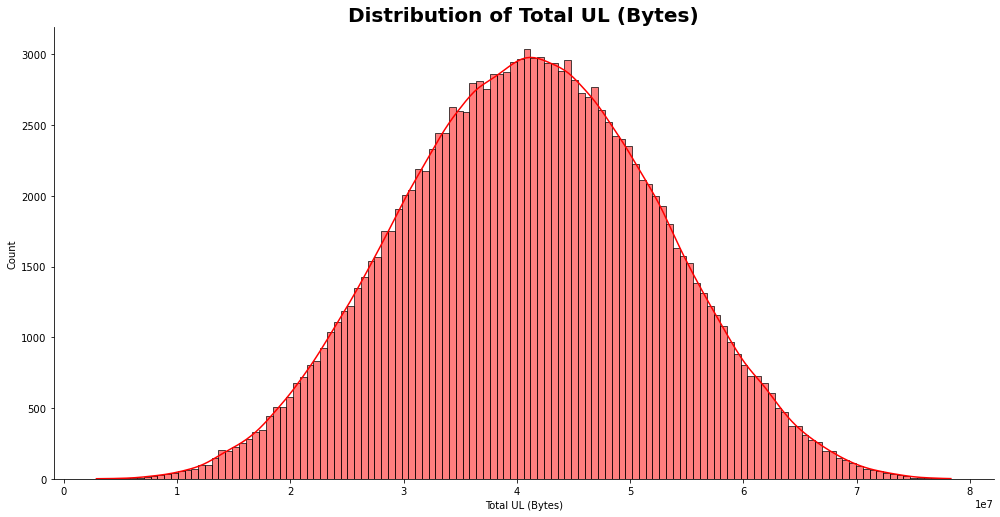

In [43]:
pltf.plot_hist(df_clean, 'Total UL (Bytes)', 'red',"totalUL.jpg")
#plt.savefig("totalUL.jpg")

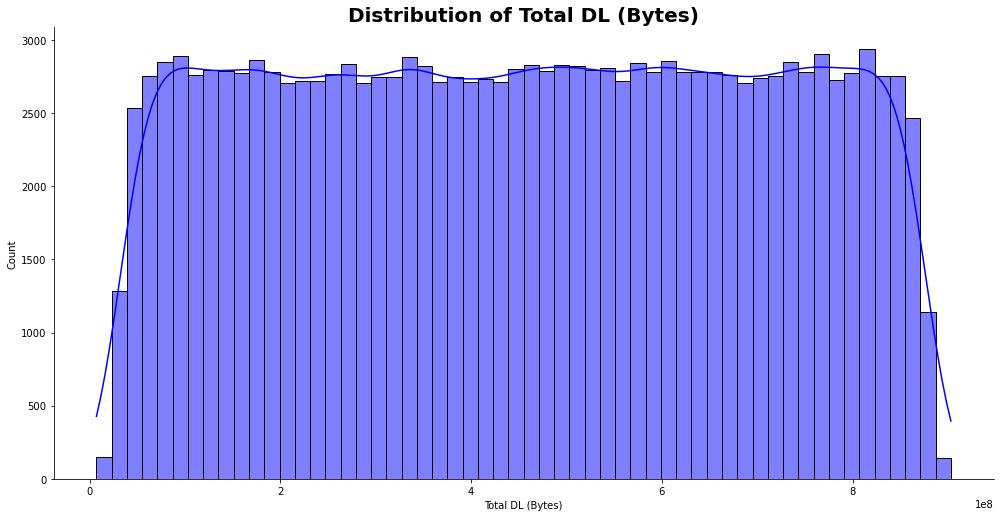

In [44]:
pltf.plot_hist(df_clean, 'Total DL (Bytes)', 'blue',"totalDL.jpg")
#plt.savefig("totalDL.jpg")

In [46]:
df_clean['Start'].min()

Timestamp('2019-04-04 12:01:00')

In [47]:
df_clean['Start'].max()

Timestamp('2019-04-29 07:28:00')